
### P10
Generate a data set of size 32 by the procedure above and run the one-dimensional decision stump algorithm on the data set to get g. Record Ein(g) and compute Eout(g) with the formula in Problem 9. Repeat the experiment 2000 times. Plot a scatter plot of (Ein(g), Eout(g)), and calculate the median of Eout(g) − Ein(g).

First, create 2 functions for later use.

Since we're going to create dataeset 2000 times, I build `get_xy` to get `x_train` and `y_train`, it takes the size of data and seed as parameter.

For `get_xy` it create initial x with `random.uniform(-1,1)` for each x, meanwhile it create the correct y val

Then, adding some noise with `random.random() < 0.1:`

Lastly, sort x, and zip with y

For `error` it simply ran over the whole x and y to check E(h)

In [88]:
import random
import numpy as np
import matplotlib.pyplot as plt


def get_xy(seed, size=32):
    random.seed(seed)

    # random create data
    X_train = []
    y_train = []

    # get right y
    for x in range(size):
        X_train.append(random.uniform(-1,1))
        if(X_train[x] > 0):
            y_train.append(1)
        else:
            y_train.append(-1)

    # add noise
    for x in range(size):
        if random.random() < 0.1:
            y_train[x] = -y_train[x]

    # sort
    sorted_data = sorted(zip(X_train, y_train), key=lambda pair: pair[0])
    sorted_x, sorted_y = zip(*sorted_data)
    X_train = np.array(sorted_x)
    y_train = np.array(sorted_y)

    return X_train, y_train

def error(theta, x, y, s):
    E = 0
    size = len(x)
    for i in range(size):
        if ((x[i] < theta) and (y[i] == s)):
            E+=1
        if ((x[i] > theta) and (y[i] == -s)):
            E+=1
    return E/size


First, we get data from `get_xy`.

Then, for all $\theta$ find the lowest $Ein$

Put it into `resultin` and calculate $Eout$, put into `resultout`, then the next loop.

Median: 0.03748215433346161


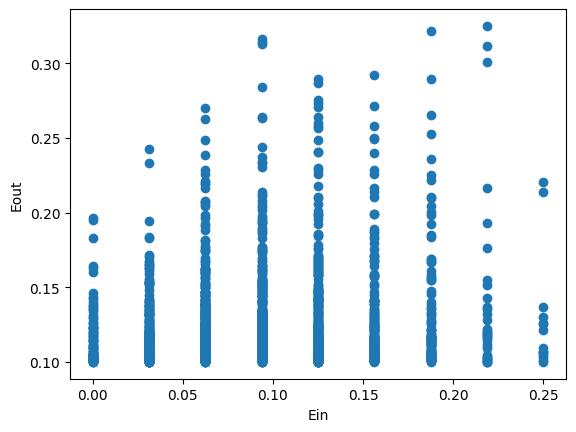

In [92]:
resulteout = []
resultin = []

for seed in range(2000):
    theta_and_s = []
    Ein = []
    # get x, y
    X_train, y_train = get_xy(seed)

    # cal Ein, h_s,theta
    minein = 10000
    besttheta = -1
    bests = 0

    # check theta = -1 first
    for s in [-1,1]:
        Ein_val = error(theta, X_train, y_train, s)
        if Ein_val <= minein:
            if(Ein_val == minein):
                if(s*theta >= besttheta*bests):
                    continue
            minein = Ein_val
            besttheta = theta
            bests = s
            
    for x in range(1,32):
        theta = (.5)*(X_train[x-1] + X_train[x])
        for s in [-1,1]:
            Ein_val = error(theta, X_train, y_train, s)
            if Ein_val <= minein:
                if(Ein_val == minein):
                    if(s*theta >= besttheta*bests):
                        continue
                minein = Ein_val
                besttheta = theta
                bests = s

    resultin.append(minein)
    Eout = .5 - 0.4*bests + 0.4*bests*np.abs(besttheta)
    resulteout.append(Eout)

resulteout = np.array(resulteout)
resultin = np.array(resultin)
print("Median:",np.median(resulteout - resultin))

# print(resulteout, resultin)
plt.scatter(resultin, resulteout)
plt.xlabel('Ein')
plt.ylabel('Eout')
plt.show()

We can see that there are 9 bars on Ein, where the two bars near Ein = 0.1 have the highest ratio, and decreases outwards.

Those nine bars are n/32, n = [0, 8]

Moreover, Eout value appears the most at Ein = 0.1 as well.

The median value is pretty low, meaning that | Eout - Ein | is low

### P11

Repeat Problem 10, but generate a data set of size 8 by the procedure instead. 

Same as above, except I set data size to 8.

Median: 0.11936397811390756


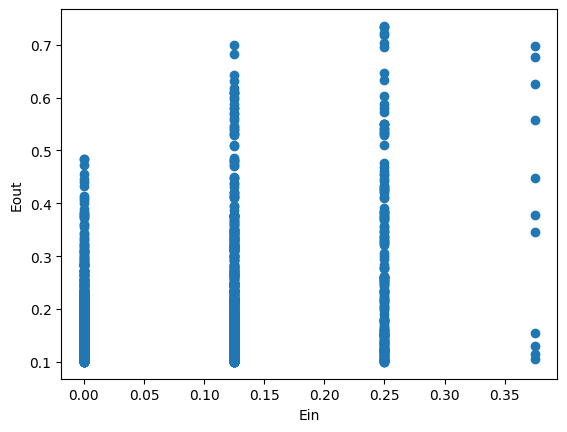

In [93]:
resulteout = []
resultin = []

for seed in range(2000):
    theta_and_s = []
    Ein = []
    X_train, y_train = get_xy(seed, 8)

    # cal Ein, h_s,theta
    minein = 10000
    besttheta = -1
    bests = 0

    # check theta = -1 first
    for s in [-1,1]:
        Ein_val = error(theta, X_train, y_train, s)
        if Ein_val <= minein:
            if(Ein_val == minein):
                if(s*theta >= besttheta*bests):
                    continue
            minein = Ein_val
            besttheta = theta
            bests = s
            
    for x in range(1,8):
        theta = (.5)*(X_train[x-1] + X_train[x])
        for s in [-1,1]:
            Ein_val = error(theta, X_train, y_train, s)
            if Ein_val <= minein:
                if(Ein_val == minein):
                    if(s*theta >= besttheta*bests):
                        continue
                minein = Ein_val
                besttheta = theta
                bests = s

    resultin.append(minein)
    Eout = .5 - 0.4*bests + 0.4*bests*np.abs(besttheta)
    resulteout.append(Eout)

resulteout = np.array(resulteout)
resultin = np.array(resultin)
print("Median:",np.median(resulteout - resultin))

plt.scatter(resultin, resulteout)
plt.xlabel('Ein')
plt.ylabel('Eout')
plt.show()

The same as previous, however only 4 bars left this time, which are n/8 n = [0,3]

Eout apppears the most at 0.1 as well.

The bar near Ein = 0.1 should be the most, but in this case it's hard to tell. The bar at Ein = 0.25 is pretty tall.

Moreover, Median grew a bit, with less data size, | Eout - Ein | becomes bigger.

### P12

 Repeat Problem 11, generate a data set of size 8 by the procedure above. Instead of running the decision stump algorithm, return a randomly chosen hs,θ as g

Median -0.0016902767255976836


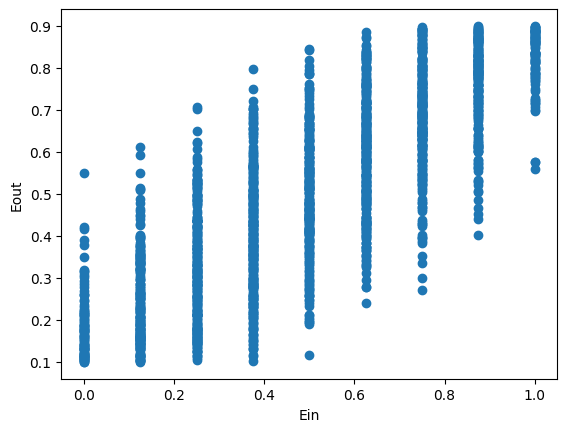

In [91]:
resulteout = []
resultin = []
for seed in range(2000):

    X_train, y_train = get_xy(seed,8)

    # cal Ein, h_s,theta
    theta = random.uniform(-1,1)
    s = -1 if random.randint(0, 1) == 0 else 1    

    Ein_val = error(theta, X_train, y_train,s)
    Eout = .5 - .4*s + .4*s*np.abs(theta)
    
    resulteout.append(Eout)
    resultin.append(Ein_val)

resulteout = np.array(resulteout)
resultin = np.array(resultin)
print("Median",np.median(resulteout - resultin))

plt.scatter(resultin, resulteout)
plt.xlabel('Ein')
plt.ylabel('Eout')
plt.show()

In this case, we can see that Ein grows with Eout.

The median became extremely low.

Since we are not looking for the best h, we can get really bad $\theta$ and s. from Eout = 0.5-0.4s+0.4s| $\theta$ | we can see that it grows with | $\theta$ | and s.

Therefore, Eout max value reaches 0.9.

Moreover, since s and $\theta$ is totally random, we can be totally right or totally wrong. Therefore, the value of Ein is from 0~1, since data set has size of 8, there are 9 possibility.


